# Análisis Multivariado de  Proteómica y Transcriptómica de Gliomas Difusos

Este proyecto explora la relación entre la expresión de genes y proteínas en gliomas difusos, utilizando métodos multivariados para identificar biomarcadores potenciales y firmas moleculares asociadas a características clínicas.

## Dataset Ómico

- Proteómica: expresión relativa de 174 proteínas involucradas en señalización y regulación celular.

- Transcriptómica: expresión de 145 transcritos.

Datos preprocesados: normalizados y escalados para análisis multivariado.

## Metodología

- Se utilizó Partial Least Squares (PLS) para integrar datos transcriptómicos y proteómicos y asociarlos a outcomes clínicos.

- Se calculó el VIP (Variable Importance in Projection) para identificar las variables más relevantes.

- Se consideraron relevantes las proteínas y genes con VIP > 1.0.

## Resultados Principales

### Proteínas relevantes: 46

Top 10 Proteínas por VIP
| Rank | Proteína    | VIP   |
|------|------------|-------|
| 1    | Syk_p       | 2.047 |
| 2    | YAP_pS127_p | 1.887 |
| 3    | AR_p        | 1.840 |
| 4    | ACC_pS79_p  | 1.624 |
| 5    | 53BP1_p     | 1.582 |
| 6    | DJ-1_p      | 1.570 |
| 7    | ACC1_p      | 1.546 |
| 8    | YAP_p       | 1.537 |
| 9    | HER3_pY1289_p | 1.521 |
| 10   | c-Kit_p     | 1.477 |


### Genes relevantes: 69

Top 10 Genes por VIP
| Rank | Gen       | VIP   |
|------|-----------|-------|
| 1    | STAT5A    | 2.327 |
| 2    | YBX1      | 2.326 |
| 3    | XRCC1     | 2.197 |
| 4    | RPS6KA1   | 2.192 |
| 5    | PARK7     | 2.167 |
| 6    | ACACA     | 2.080 |
| 7    | SYK       | 2.066 |
| 8    | FASN      | 2.060 |
| 9    | NRAS      | 1.977 |
| 10   | PRKCD     | 1.948 |


Estos resultados representan las variables ómicas más influyentes en los outcomes clínicos y podrían constituir un primer conjunto de biomarcadores potenciales.

## Tecnologías y Herramientas

- Lenguajes: Python

- Librerías Python: pandas, NumPy, Matplotlib, Seaborn, scikit-learn

- Análisis multivariado: PLS, VIP



In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Análisis multiomicos\Análisis multi-ómico de gliomas difusos\Glioma.csv")
data.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.6130,759.8070,6062.5131,2080.1343,7140.3398,10055.3807,30969.1630,9261.5901
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.4670,6655.3614,730.4312,9499.7415,7289.4220,20114.1557,18329.4385
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.0430,22488.9192,12954.6539
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.4240


In [3]:
# Separar datos clínicos, transcriptómicos y proteómicos
clinical_cols = ['Case', 'years_to_birth', 'gender', 'histological_type', 'race', 'ethnicity',
                 'radiation_therapy', 'Grade', 'Mutation.Count', 'Percent.aneuploidy', 'IDH.status', 'outcome']


df_clinical = data[clinical_cols]
df_proteomic = data.loc[:, "14-3-3_beta_p":'p90RSK_pT359_S363_p']
df_transcriptomic = data.loc[:, "ACACA":'YWHAZ']

In [27]:
df_proteomic.shape

(306, 174)

In [28]:
df_transcriptomic.shape

(306, 145)

In [4]:
# Escalar transcriptómica y proteómica
scaler = StandardScaler()
X_proteomic_scaled = scaler.fit_transform(df_proteomic)
X_transcriptomic_scaled = scaler.fit_transform(df_transcriptomic)

# Combinar matrices moleculares
X = np.hstack([X_transcriptomic_scaled, X_proteomic_scaled])
y = data['outcome']

In [5]:
# Crear modelo PLS con 2 componentes (ajustable)
pls = PLSRegression(n_components=2)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pls, X, y, cv=cv, scoring='accuracy')
print("Accuracy promedio CV:", np.mean(scores))

# Ajustar modelo completo
pls.fit(X, y)


Accuracy promedio CV: nan


c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\metrics\_classification.py", line 231,

PLSRegression()

In [6]:
# Columnas de proteínas y genes
proteomic_cols = [col for col in data.columns if col.endswith('_p')]  # proteínas
transcriptomic_cols = [col for col in data.columns if col not in clinical_cols + proteomic_cols]

# PLS scores 
loadings = pd.DataFrame(pls.x_weights_, 
                        index=list(transcriptomic_cols) + list(proteomic_cols),
                        columns=['PLS1', 'PLS2'])
print(loadings.sort_values('PLS1', ascending=False).head(10))


                 PLS1      PLS2
STAT5A       0.152390  0.014241
RPS6KA1      0.143438  0.015493
YBX1         0.142646  0.088638
XRCC1        0.135774  0.079182
SYK          0.135360  0.010702
Syk_p        0.133705 -0.019994
PARK7        0.131057  0.090239
NRAS         0.127370  0.039538
YAP_pS127_p  0.122301  0.031045
PRKCD        0.120678  0.068810


In [7]:
loadings.shape

(319, 2)

In [8]:
from matplotlib.patches import Ellipse
def plot_pls_scores(scores_df, components=['PLS1','PLS2']):
    """
    Gráfico de scores PLS usando un DataFrame ya calculado.
    Añade colores por outcome, ejes en cero y elipses de confianza (95%).
    """
    comp1, comp2 = components

    plt.figure(figsize=(10, 8))

    # Colores para cada grupo
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    for i, outcome in enumerate(sorted(scores_df['outcome'].unique())):
        mask = scores_df['outcome'] == outcome
        plt.scatter(scores_df.loc[mask, comp1], 
                    scores_df.loc[mask, comp2],
                    c=colors[i], label=f'Outcome {outcome}', 
                    alpha=0.7, s=80, edgecolors='white', linewidth=0.5)
        
        # Añadir elipse de confianza 95%
        if np.sum(mask) > 2:
            x_data = scores_df.loc[mask, comp1]
            y_data = scores_df.loc[mask, comp2]
            mean_x, mean_y = np.mean(x_data), np.mean(y_data)
            cov = np.cov(x_data, y_data)
            eigenvals, eigenvecs = np.linalg.eigh(cov)
            angle = np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0]))
            width, height = 2 * np.sqrt(eigenvals) * 2.448  # 95% confianza
            ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle,
                              facecolor=colors[i], alpha=0.2, edgecolor=colors[i], linewidth=2)
            plt.gca().add_patch(ellipse)

    plt.xlabel(comp1)
    plt.ylabel(comp2)
    plt.title('PLS projection of glioma samples')
    plt.axhline(0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(0, color='k', linestyle='--', alpha=0.3)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


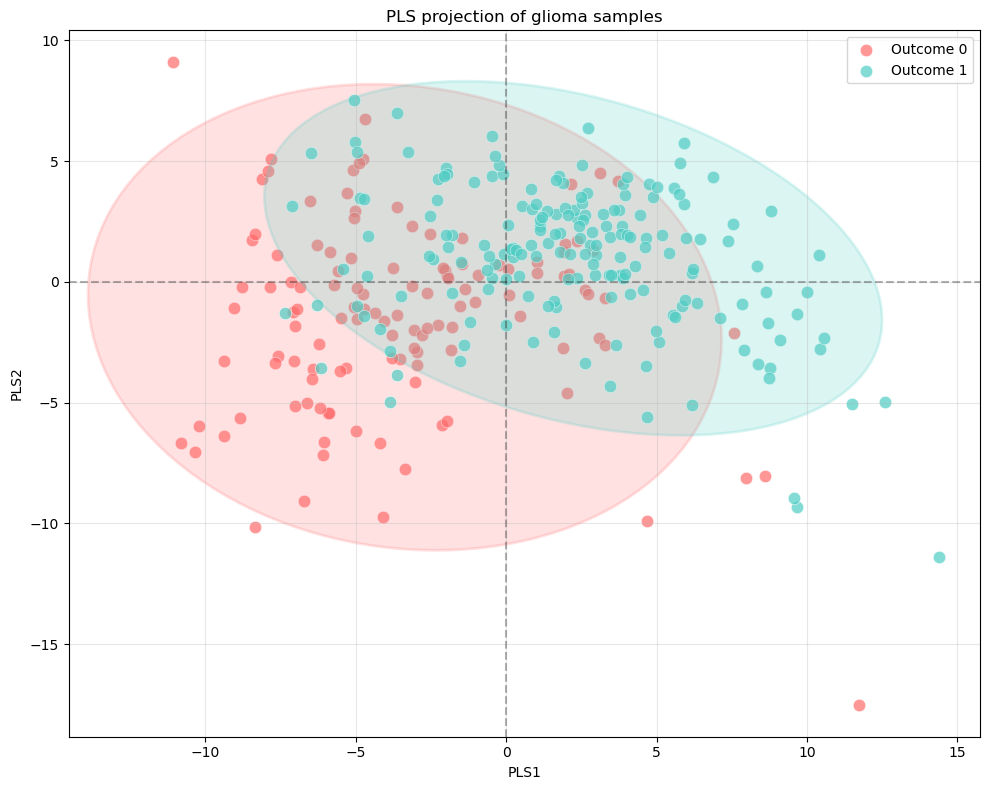

In [9]:
scores_df = pd.DataFrame(pls.x_scores_, columns=['PLS1', 'PLS2'])
scores_df['outcome'] = df_clinical['outcome'].values

plot_pls_scores(scores_df, components=['PLS1','PLS2'])

In [10]:
loadings.shape

(319, 2)

In [11]:
# Calcular VIP scores
def calculate_vip(model):
    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_
    p, h = w.shape
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    vip = np.sqrt(p * (w**2 @ s / total_s))
    return vip

In [12]:
calc_vip = calculate_vip(pls)
calc_vip

array([[2.07995665],
       [0.55393705],
       [0.63463495],
       [1.72177677],
       [0.72570851],
       [1.80392815],
       [1.66145875],
       [0.34941194],
       [1.16076849],
       [1.73978534],
       [0.34558129],
       [0.59106089],
       [1.33872073],
       [1.33562116],
       [1.56187664],
       [1.5033481 ],
       [0.27083793],
       [1.56664127],
       [0.23099989],
       [0.21742895],
       [0.92488514],
       [0.86160609],
       [1.31153287],
       [0.70519384],
       [1.31793815],
       [1.06344947],
       [0.83088606],
       [0.32515575],
       [0.91883206],
       [0.46897253],
       [0.99046904],
       [0.74420622],
       [0.31460454],
       [0.61312644],
       [0.56378674],
       [1.00852078],
       [0.70990554],
       [1.45904424],
       [1.16495316],
       [1.34234342],
       [0.56546001],
       [0.56348427],
       [1.73494398],
       [0.46977181],
       [0.65850869],
       [0.38045993],
       [0.62601415],
       [1.004

In [13]:
# Crear DataFrame de VIP scores
vip_df = pd.DataFrame(calc_vip, 
                      index=list(transcriptomic_cols) + list(proteomic_cols),
                      columns=['VIP'])  # solo una columna
vip_df.sort_values('VIP', ascending=False).head(10)


,VIP
STAT5A,2.327376
YBX1,2.326031
XRCC1,2.197331
RPS6KA1,2.191843
PARK7,2.167422
ACACA,2.079957
SYK,2.066330
FASN,2.060086
Syk_p,2.047165
NRAS,1.976617


In [14]:
vip_df_reset = vip_df.reset_index()  # convierte el índice en columna
vip_df_reset.columns = ['Gene_or_Protein', 'VIP']  # renombra las columnas
vip_df_reset.head(10)

,Gene_or_Protein,VIP
0,ACACA,2.079957
1,ACACB,0.553937
2,ACVRL1,0.634635
3,AKT1S1,1.721777
4,AKT1,0.725709
5,AKT2,1.803928
6,AKT3,1.661459
7,ANXA7,0.349412
8,ARAF,1.160768
9,AR,1.739785


In [15]:
vip_df_reset.shape

(319, 2)

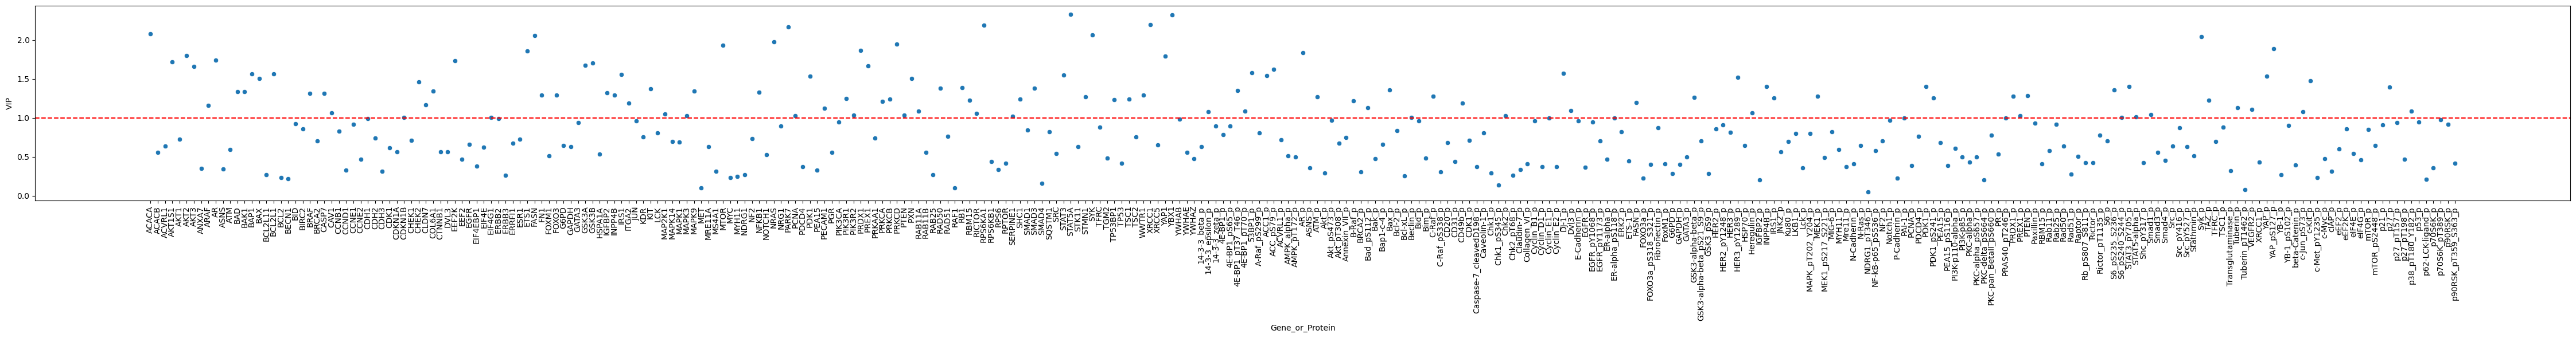

In [16]:
# Distribución de valores VIP

plt.figure(figsize=(45, 6))
sns.scatterplot(data=vip_df_reset, x='Gene_or_Protein', y='VIP')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='VIP=2')
plt.show()

In [17]:
proteinas_importantes = vip_df_reset[vip_df_reset['VIP'] > 1]  # Filtrar proteínas con VIP > 1
proteinas_importantes

,Gene_or_Protein,VIP
0,ACACA,2.079957
3,AKT1S1,1.721777
5,AKT2,1.803928
6,AKT3,1.661459
8,ARAF,1.160768
...,...,...
293,YAP_pS127_p,1.887034
297,c-Jun_pS73_p,1.081786
298,c-Kit_p,1.476647
309,p27_p,1.396402


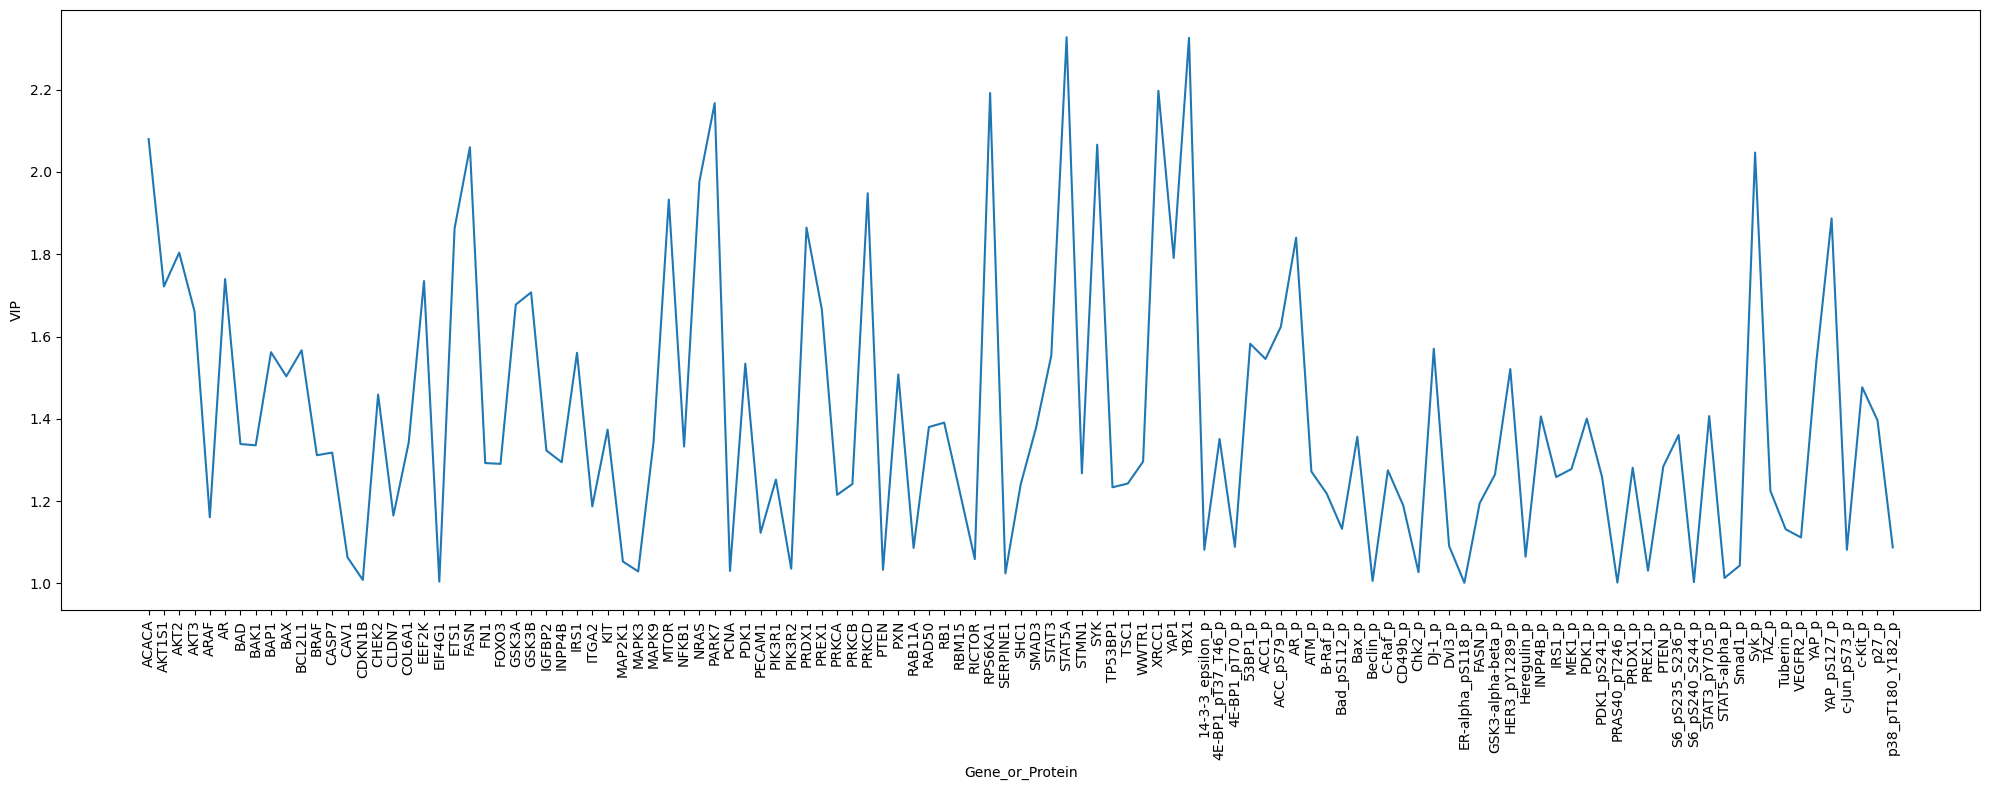

In [18]:
# Gráfico de VIP scores de proteínas importantes
plt.figure(figsize=(20, 8))
sns.lineplot(data=proteinas_importantes, x='Gene_or_Protein', y='VIP')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [19]:
# Contar proteínas y genes en las importantes
proteins = proteinas_importantes['Gene_or_Protein'].str.endswith('_p')  # True para proteínas
genes = ~proteins  # lo contrario, son genes

# Contar
num_proteins = proteins.sum()
num_genes = genes.sum()

print(f"Proteínas: {num_proteins}")
print(f"Genes: {num_genes}")

Proteínas: 46
Genes: 69


In [25]:
df_proteins = proteinas_importantes[proteins]
df_genes = proteinas_importantes[genes]

df_proteins = df_proteins.sort_values(by='VIP', ascending=False)
df_proteins.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_7748\2844174517.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_proteins = proteinas_importantes[proteins]


,Gene_or_Protein,VIP
283,Syk_p,2.047165
293,YAP_pS127_p,1.887034
159,AR_p,1.840206
155,ACC_pS79_p,1.623529
152,53BP1_p,1.582375
195,DJ-1_p,1.570379
154,ACC1_p,1.545577
292,YAP_p,1.537443
219,HER3_pY1289_p,1.520912
298,c-Kit_p,1.476647


In [26]:
df_genes = df_genes.sort_values(by='VIP', ascending=False)
df_genes.head(10)

,Gene_or_Protein,VIP
127,STAT5A,2.327376
141,YBX1,2.326031
138,XRCC1,2.197331
115,RPS6KA1,2.191843
88,PARK7,2.167422
0,ACACA,2.079957
130,SYK,2.066330
53,FASN,2.060086
86,NRAS,1.976617
103,PRKCD,1.948182


In [ ]:
proteinas_importantes.to_csv("proteinas_y_genes_importantes_PLS.csv", index=False) 